 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path("../Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col= "Date", infer_datetime_format=True, parse_dates=True,)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.shape

(1059, 4)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()
algo_df.shape

(1241, 2)

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.shape

(1235, 2)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype("float")
sp500_df.sort_index(inplace=True)
sp500_df

<ipython-input-10-babcf6ef3b12>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

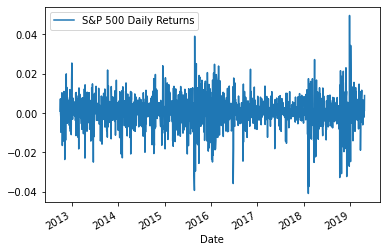

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename({'Close' : 'S&P 500 Daily Returns'}, axis=1, inplace=True)
sp500_returns.head()
sp500_returns.plot()

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500 Daily Returns          0
dtype: int64

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':"Daily Returns of all Portfolio's"}, xlabel='Date'>

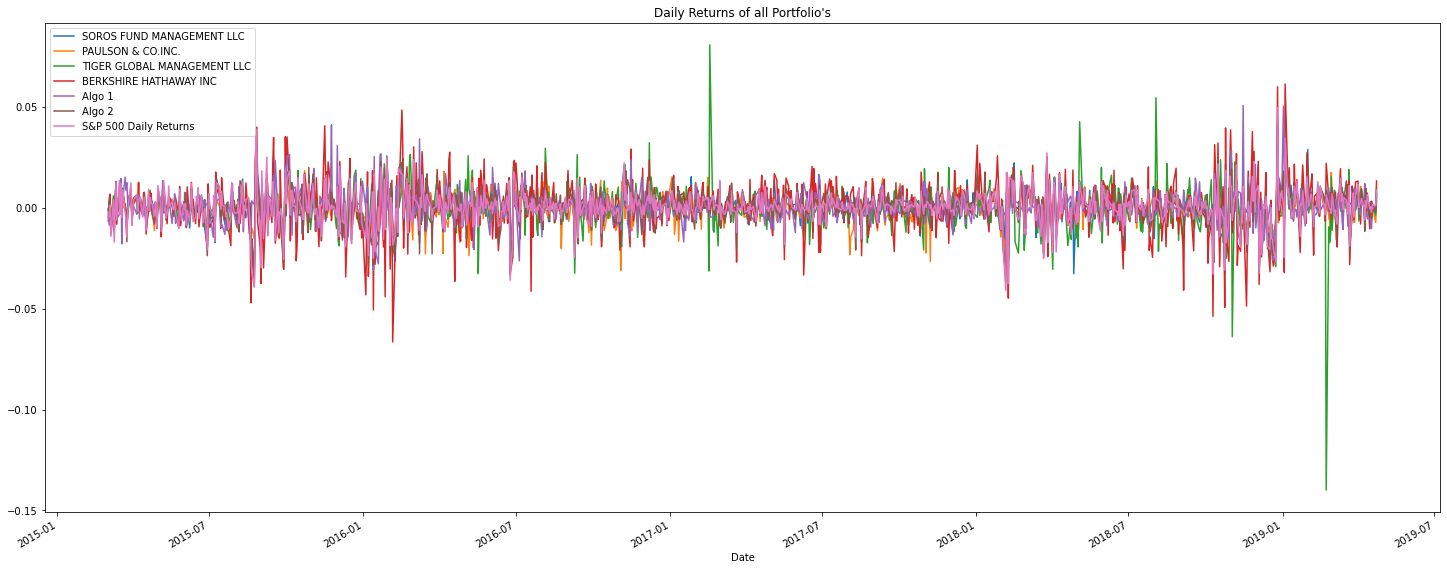

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (25,10), title = "Daily Returns of all Portfolio's")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':"Cumulative Returns of all Portfolio's"}, xlabel='Date'>

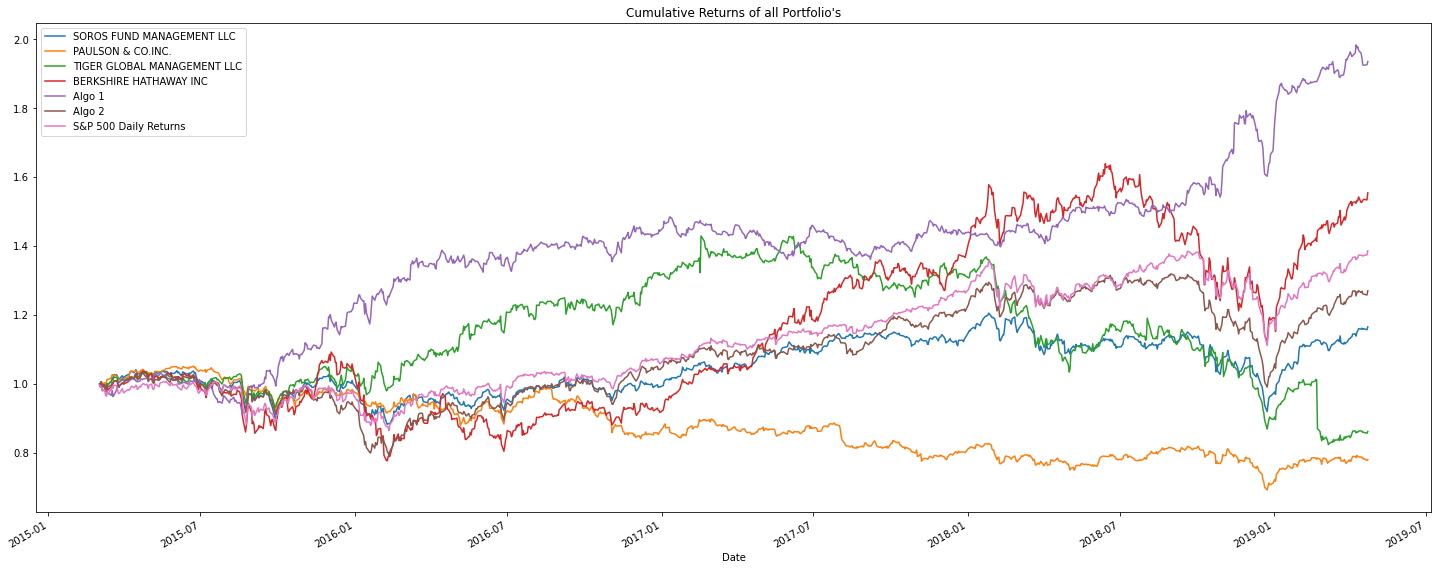

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() 
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize = (25,10), title = "Cumulative Returns of all Portfolio's")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios in a Box Plot'}>

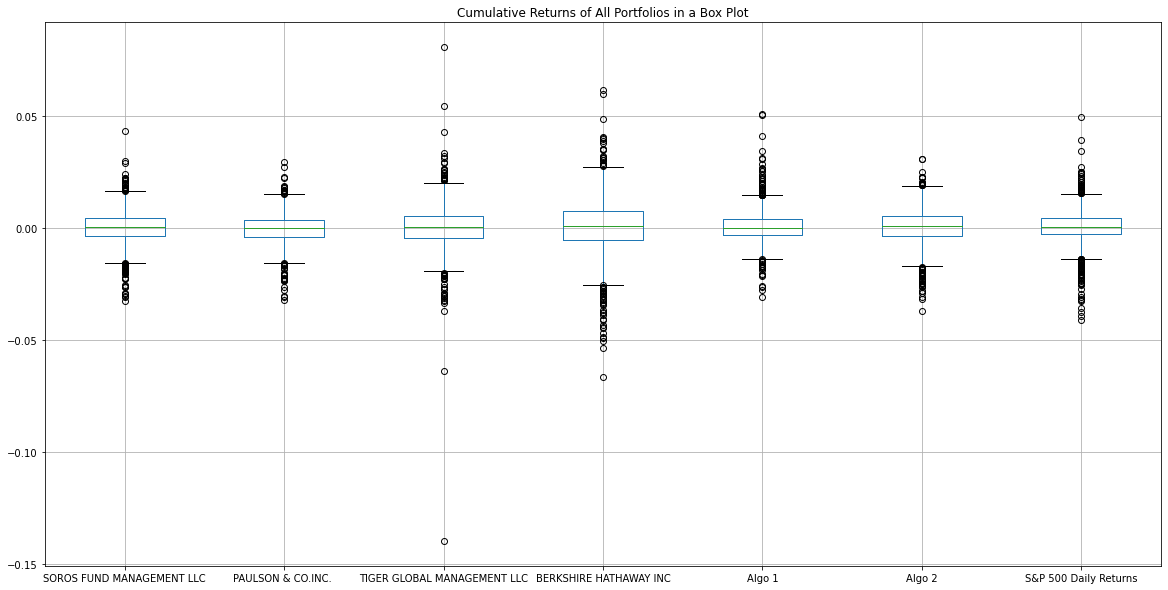

In [17]:
# Box plot to visually show risk 
combined_df.plot(kind='box', figsize=(20,10), grid=True, title="Cumulative Returns of All Portfolios in a Box Plot")

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500 Daily Returns          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
df_daily_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"})
df_daily_std
# Determine which portfolios are riskier than the S&P 500
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["S&P 500 Daily Returns", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500 Daily Returns,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

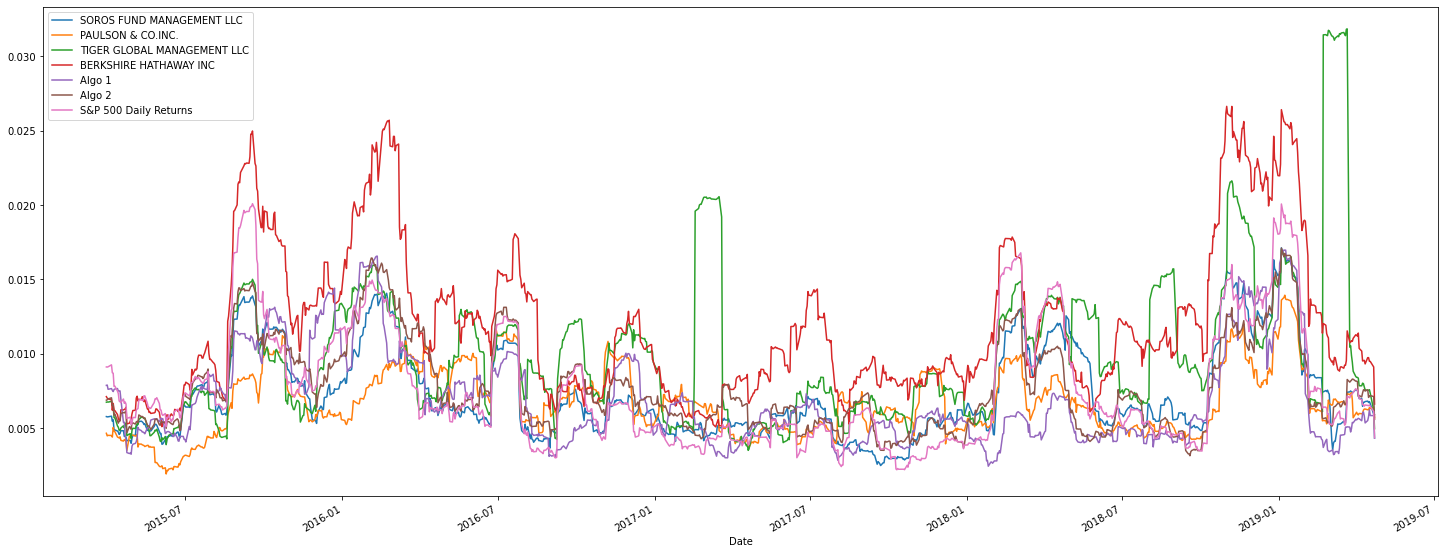

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_df.rolling(window=21).std()
rolling_std_21
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

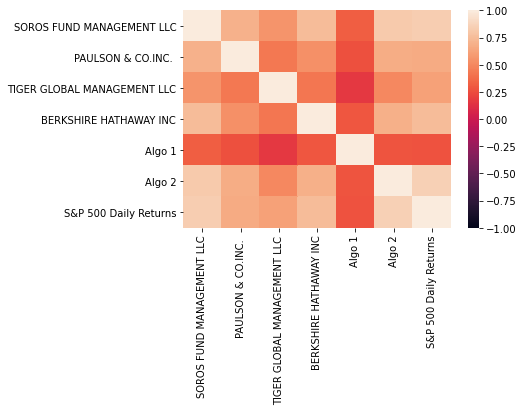

In [22]:
# Calculate the correlation
correlation = combined_df.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Algo 1'}, xlabel='Date'>

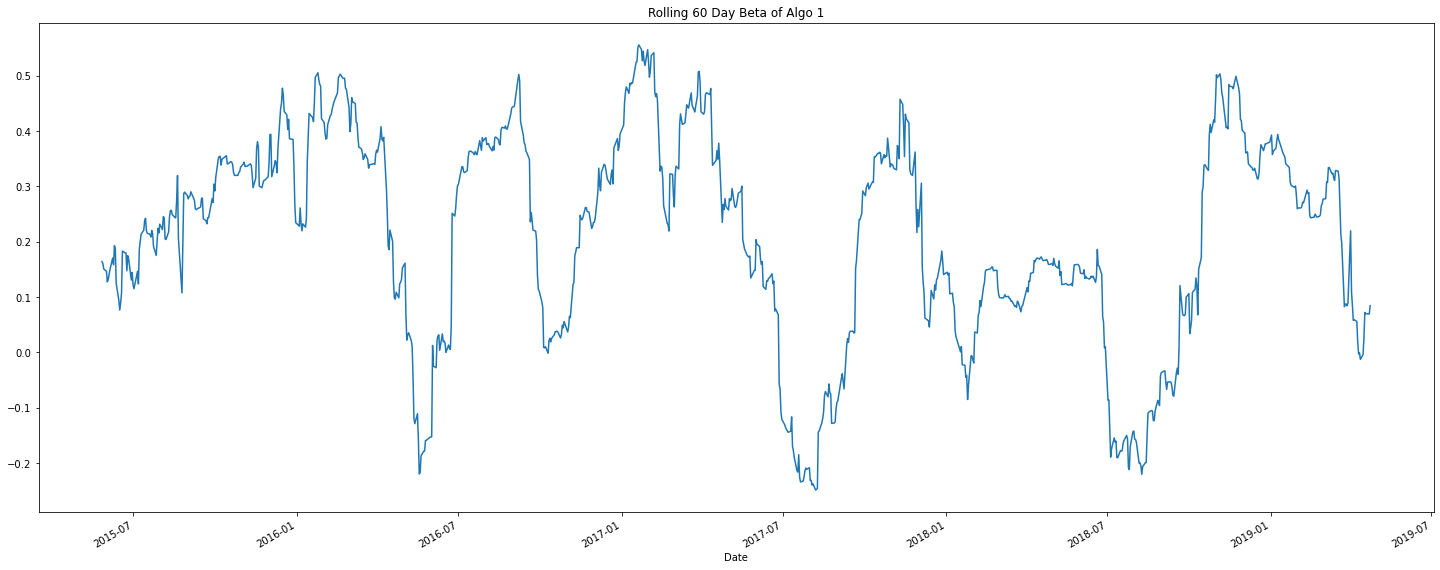

In [23]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P 500 Daily Returns'])
rolling_covariance
# Calculate variance of S&P 500
rolling_variance = combined_df['S&P 500 Daily Returns'].rolling(window=60).var()
rolling_variance
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta
# Plot beta trend
rolling_beta.plot(figsize=(25,10), title = "Rolling 60 Day Beta of Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

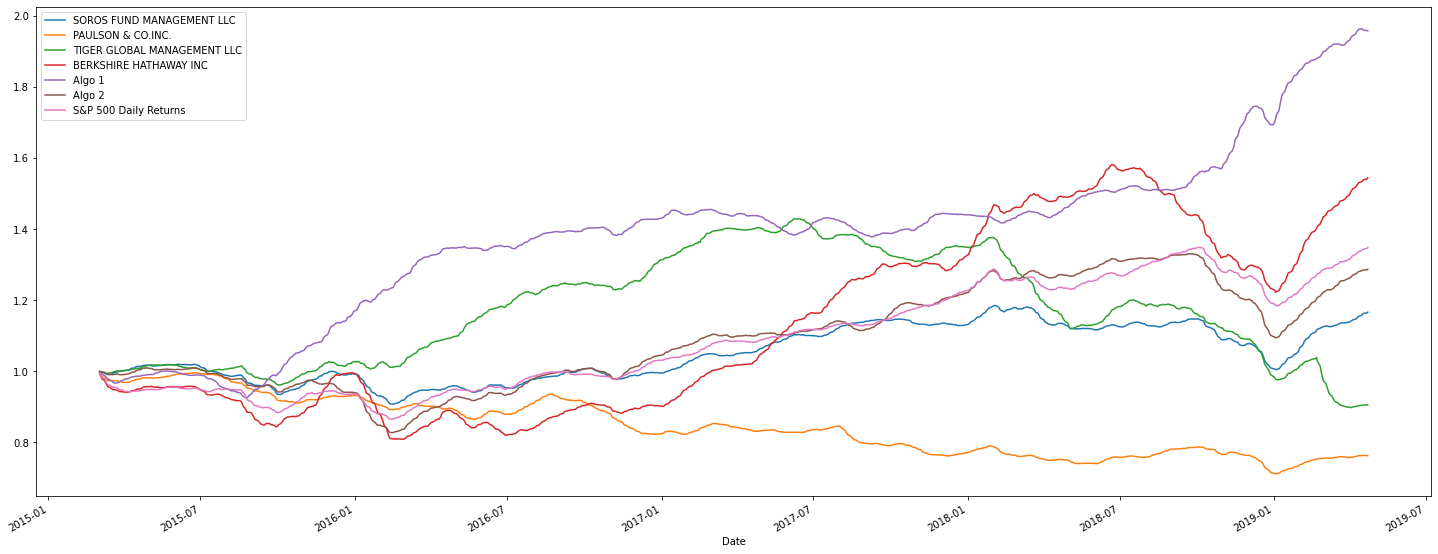

In [24]:
# Use `ewm` to calculate the rolling window
df_daily_ewm = combined_df.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (25,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500 Daily Returns          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

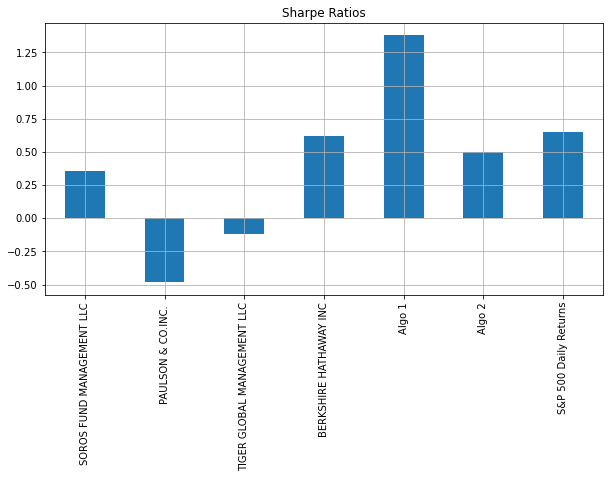

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios", grid=True, figsize=(10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 does and Algo 2 is right there with S&P 500 and the whale portfolio just slightly under.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
aapl_history = Path("../Starter_Code/Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_history, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename(columns = {"NOCP":"AAPL"}, inplace = True)
aapl_df.drop(columns = 'Symbol', inplace=True)
aapl_df.sort_index(inplace=True)
aapl_df.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [28]:
# Reading data from 2nd stock
goog_history = Path("../Starter_Code/Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_history, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename(columns = {"NOCP":"GOOG"}, inplace = True)
goog_df.drop(columns = 'Symbol', inplace=True)
goog_df.sort_index(inplace=True)
goog_df.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [29]:
# Reading data from 3rd stock
cost_history = Path("../Starter_Code/Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_history, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename(columns = {"NOCP":"COST"}, inplace = True)
cost_df.drop(columns = 'Symbol', inplace=True)
cost_df.sort_index(inplace=True)
cost_df.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [30]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat((aapl_df, cost_df, goog_df), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [31]:
# Reset Date index
#already did this up above by using index_col="Trade DATE"

In [32]:
# Reorganize portfolio data by having a column per symbol

#also displayed how to do this up above with the .drop function


In [33]:
# Calculate daily returns
my_stock_returns = my_stocks.pct_change()
my_stock_returns

# Drop NAs
my_stock_returns.dropna()
# Display sample data
my_stock_returns.sample

<bound method NDFrame.sample of                 AAPL      COST      GOOG
Trade DATE                              
2018-05-11       NaN       NaN       NaN
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
...              ...       ...       ...
2019-05-03  0.012431  0.007953  0.019602
2019-05-06 -0.015443 -0.001594  0.003366
2019-05-07 -0.026957 -0.016583 -0.012855
2019-05-08  0.000197  0.004830 -0.006669
2019-05-09 -0.010744  0.008826 -0.003335

[250 rows x 3 columns]>

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns
# Display sample data
my_portfolio_returns.sample

<bound method NDFrame.sample of Trade DATE
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
2018-05-18   -0.009248
                ...   
2019-05-03    0.016922
2019-05-06    0.000201
2019-05-07   -0.015200
2019-05-08   -0.004100
2019-05-09   -0.002446
Length: 249, dtype: float64>

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((my_portfolio_returns,combined_df), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
portfolio_std = portfolio_returns * np.sqrt(252)
portfolio_std

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
2018-05-14,0.017346,0.000000,0.000000,0.000000,0.000000,0.014523,0.025952,0.014025
2018-05-15,-0.246851,-0.011523,-0.022364,-0.050632,-0.231862,-0.018014,-0.018078,-0.108616
2018-05-16,0.081592,0.137112,0.099126,0.086985,0.068418,-0.036931,0.053034,0.064459
2018-05-17,-0.037615,-0.031042,0.040065,-0.099488,-0.081591,-0.110316,0.082625,-0.013586
2018-05-18,-0.146808,-0.069171,-0.042424,-0.203700,-0.035113,0.040597,-0.039629,-0.041785
...,...,...,...,...,...,...,...,...
2019-04-16,0.048195,0.042852,0.006162,-0.013191,0.013282,-0.110244,0.046027,0.008086
2019-04-17,0.126391,-0.045984,-0.102663,-0.069998,0.051150,-0.163524,-0.082994,-0.036095
2019-04-18,0.009515,0.022985,0.019396,0.009232,0.030417,-0.009333,-0.019513,0.025067
2019-04-22,0.101214,-0.041047,-0.116402,-0.057787,-0.017268,0.010740,-0.030728,0.016066


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

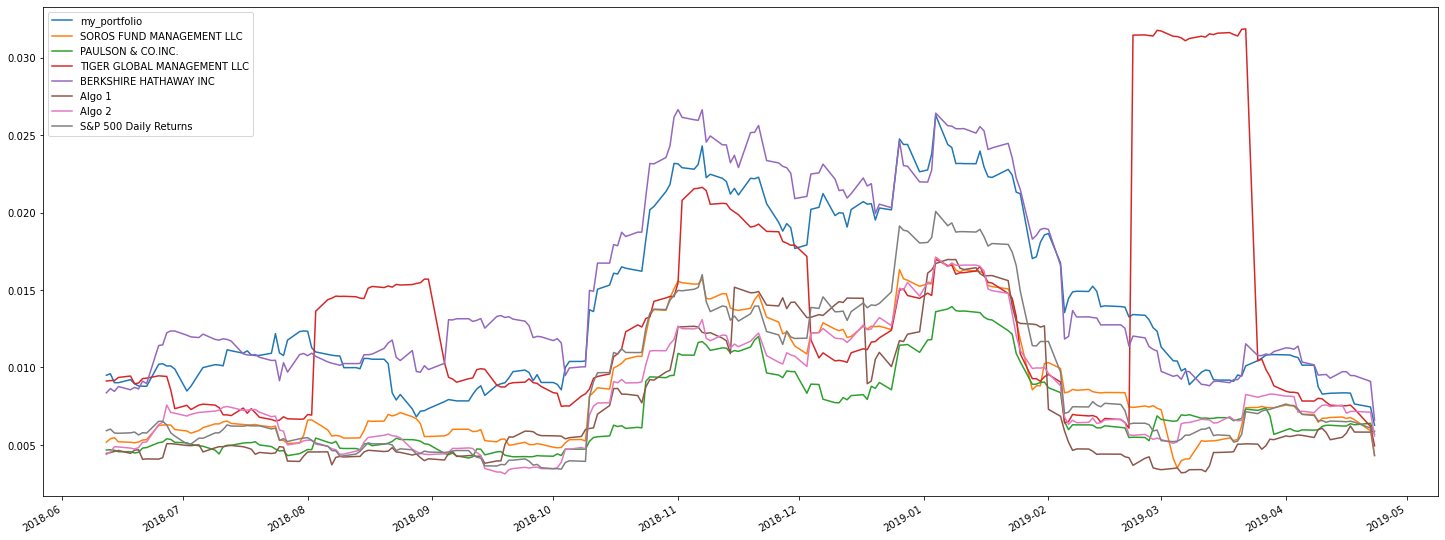

In [38]:
# Calculate rolling standard deviation
portfolio_rolling_21 = portfolio_returns.rolling(window=21).std()
portfolio_rolling_21.dropna(inplace=True)
portfolio_rolling_21
# Plot rolling standard deviation
portfolio_rolling_21.plot(figsize = (25,10))

### Calculate and plot the correlation

<AxesSubplot:>

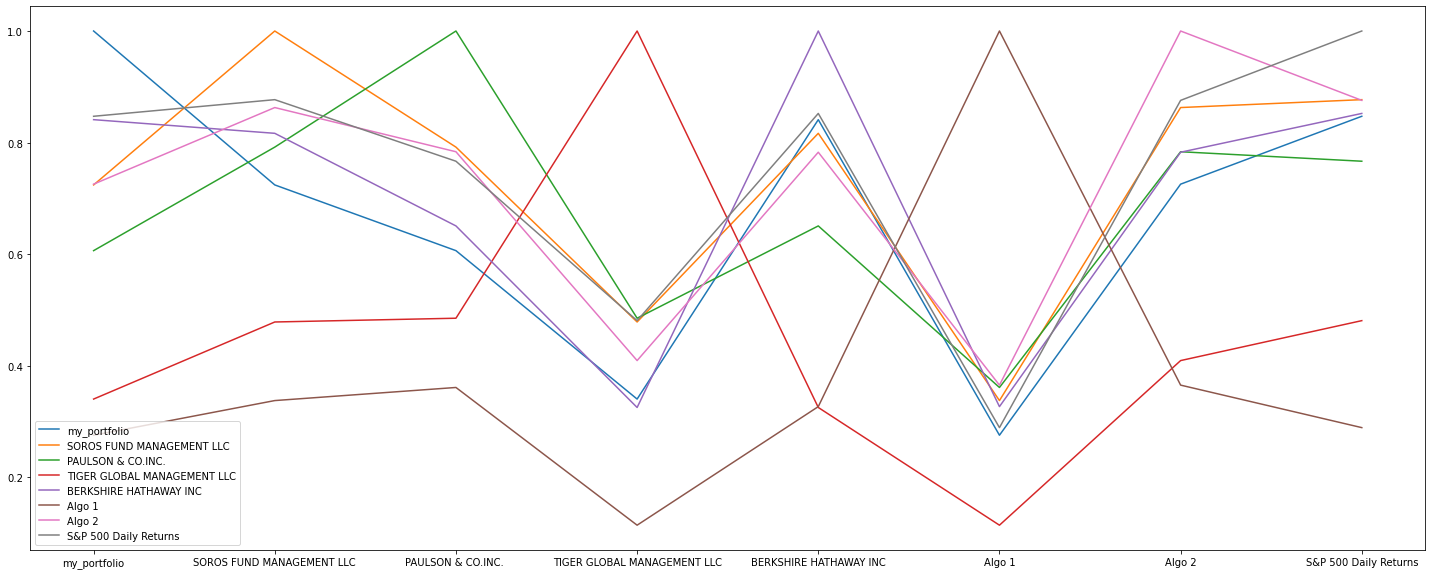

In [39]:
# Calculate and plot the correlation
portfolio_corr = portfolio_returns.corr()
portfolio_corr
portfolio_corr.plot(figsize = (25,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}>

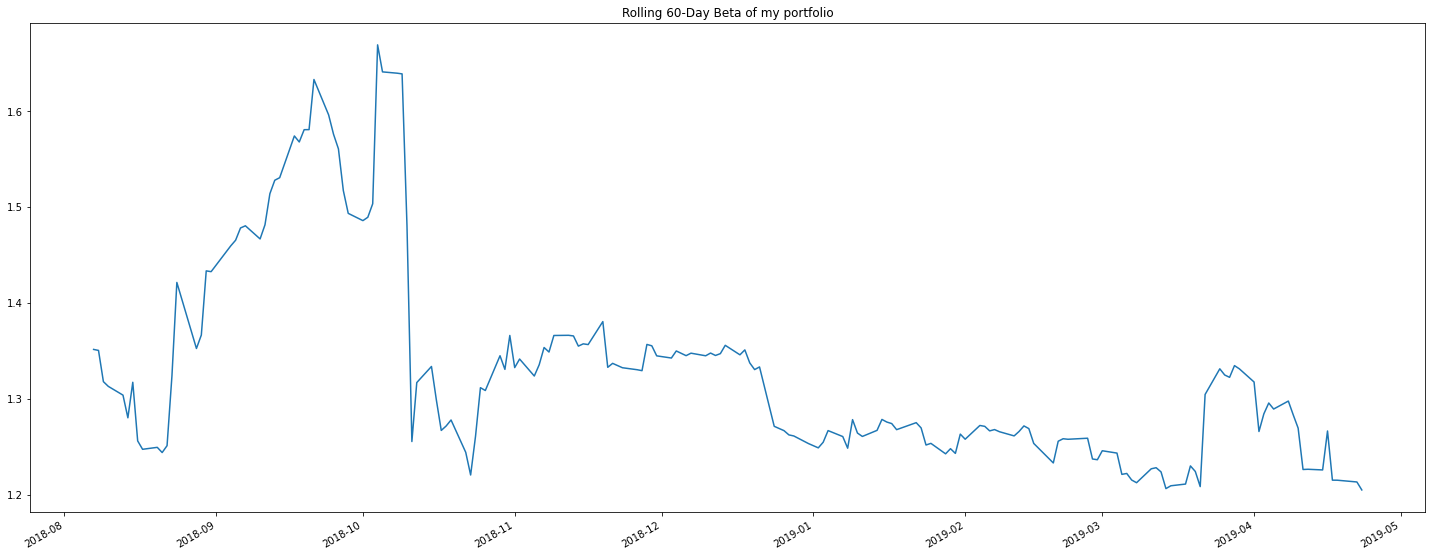

In [40]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns['S&P 500 Daily Returns'])
rolling_variance = portfolio_returns['S&P 500 Daily Returns'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(25, 10), title='Rolling 60-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios
annualized_sharpe_ratios = portfolio_returns.mean()*252/(portfolio_returns.std()*np.sqrt(252))
annualized_sharpe_ratios

my_portfolio                   0.797793
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500 Daily Returns          0.584820
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

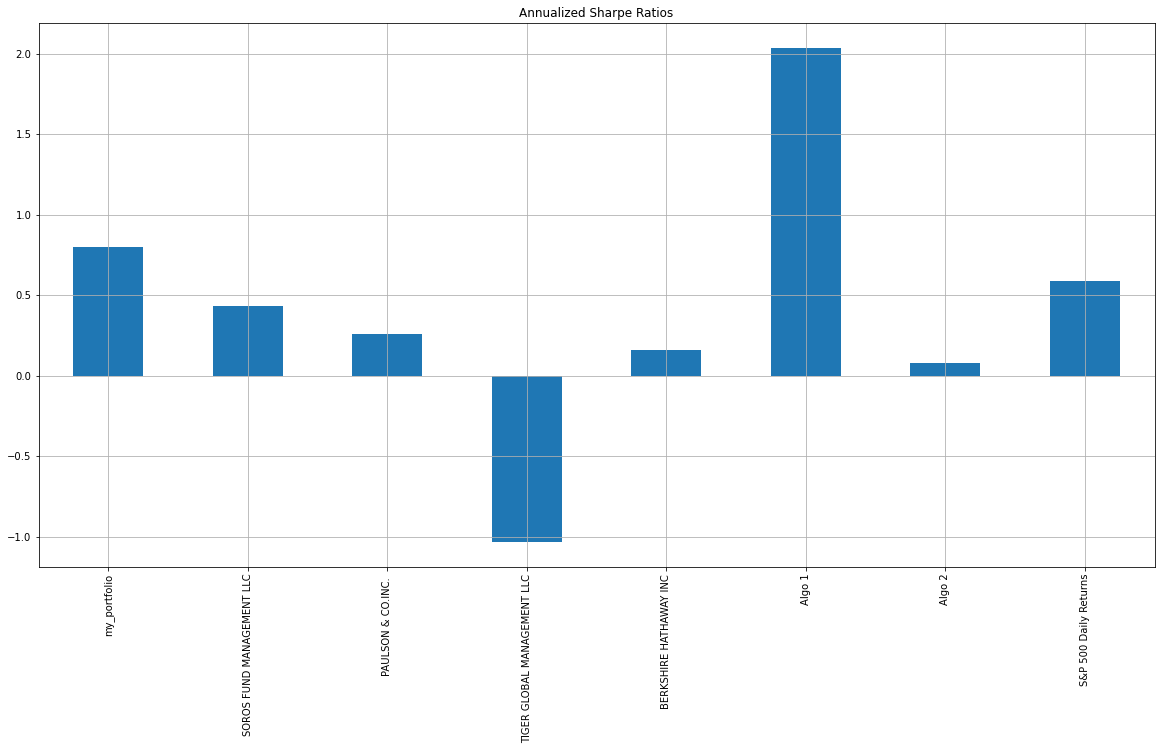

In [42]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(figsize=(20,10), kind='bar', grid=True, title= 'Annualized Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [43]:
#My portfolio is better than any of the other protfolios besides algo 1. Algo 1 is the better risk adjusted portfolio